<a href="https://colab.research.google.com/github/alexgcsa/incob2023/blob/main/UnderstandingSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Just data

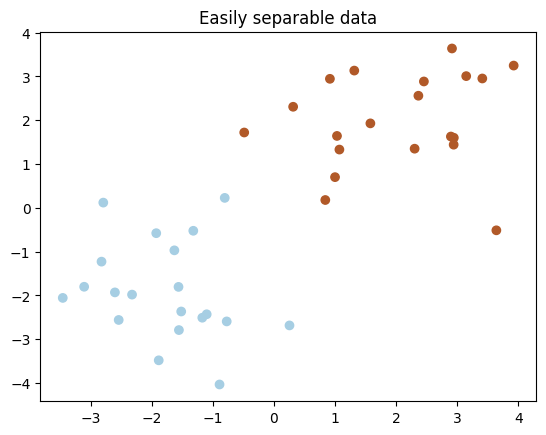

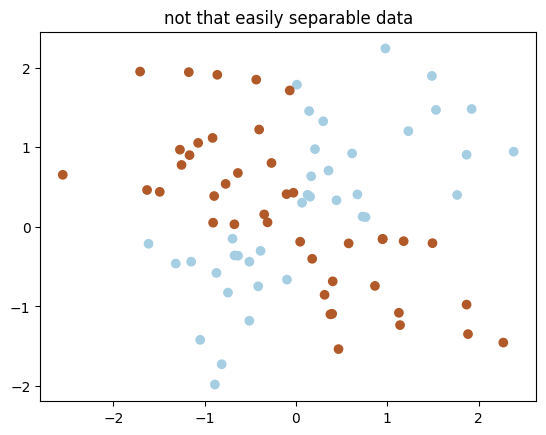

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate linearly separable data
#np.random.seed(0)
X = np.concatenate((np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]))
y = np.concatenate((np.zeros(20), np.ones(20)))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
plt.title('Easily separable data')
plt.show()

# Generate non-linearly separable data
np.random.seed(0)
X = np.random.randn(80, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
plt.title('not that easily separable data')

plt.show()


# Linear data - Linear kernel

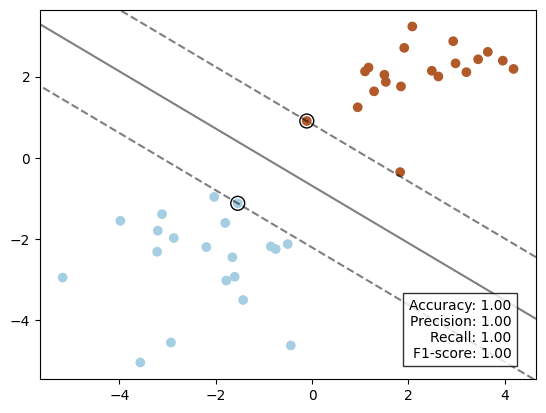

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate linearly separable data
#np.random.seed(0)
X = np.concatenate((np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]))
y = np.concatenate((np.zeros(20), np.ones(20)))

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
# Predict labels for the data points
y_pred = clf.predict(X)

# Compute accuracy metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and the margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
# Print accuracy metrics
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}",
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.show()


# Non-linear data - Linear kernel

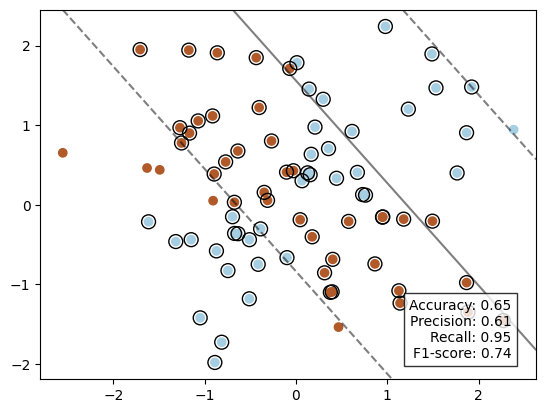

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate non-linearly separable data
np.random.seed(0)
X = np.random.randn(80, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Create and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Predict labels for the data points
y_pred = clf.predict(X)

# Compute accuracy metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and the margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Print accuracy metrics
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}",
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.show()


# Non-linear data - Non-linear kernel

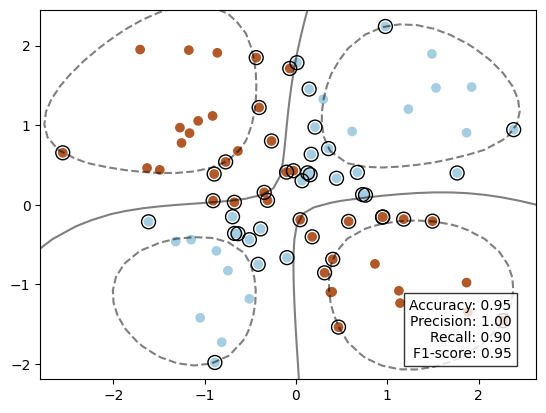

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate non-linearly separable data
np.random.seed(0)
X = np.random.randn(80, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Create and train the SVM classifier with a non-linear Gaussian (RBF) kernel
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

# Predict labels for the data points
y_pred = clf.predict(X)

# Compute accuracy metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to plot the decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and the margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Print accuracy metrics
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}",
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.show()
